In [107]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False


In [38]:
np.random.seed(991)  # 随机数种子
# 生成符合正态分布的随机数（均值、标准差、所生成随机数的个数）
x1 = np.random.normal(0, 0.4, 100)
x2 = np.random.normal(0, 0.6, 100)
x3 = np.random.normal(0, 0.2, 100)
# 生成噪声数据，保证后面模拟所生成的因变量数据比较接近实际的数据
eps = np.random.normal(0, 0.05, 100)
# 调用 c_ 函数生成自变量的数据的矩阵，按照列进行生成：100 x 3 的矩阵
X = np.c_[x1, x2, x3]
# 生成模拟数据时系数的值
beta = [0.1, 0.2, 0.7]
# 点积 + 噪声
y = np.dot(X, beta) + eps
# add_constant 矩阵加上常量 1
# 主要目的：便于估计多元线性回归模型的截距
# 便于后面进行参数估计时的计算
x_model = sm.add_constant(X)
# 调用 OLS 普通最小二乘
model = sm.OLS(y, x_model)
# fit 拟合，主要功能就是参数估计，参数估计的主要目的是估计出回归系数，根据参数估计结果来计算统计量
results = model.fit()
# summary() 方法主要是为了显示拟合的效果
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     432.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.29e-55
Time:                        10:41:53   Log-Likelihood:                 152.69
No. Observations:                 100   AIC:                            -297.4
Df Residuals:                      96   BIC:                            -287.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.005     -1.798      0.075      -0.020       0.001
x1             0.0746      0.015      4.941      0.000       0.045       0.105
x2             0.2032      0.009     22.446      0.000       0.185       0.221
x3             0.7461      0.030     25.158      0.000       0.687       0.805
==============================================================================
Omnibus:                        2.535   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.864
Skew:                           0.153   Prob(JB):                        0.394
Kurtosis:                       2.405   Cond. No.                         5.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     432.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.29e-55
Time:                        10:49:19   Log-Likelihood:                 152.69
No. Observations:                 100   AIC:                            -297.4
Df Residuals:                      96   BIC:                            -287.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.005     -1.798      0.0

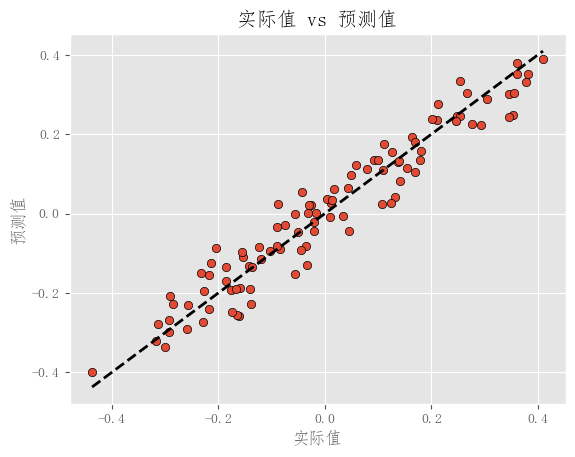

In [48]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 设置随机数种子
np.random.seed(991)

# 生成符合正态分布的随机数
x1 = np.random.normal(0, 0.4, 100)
x2 = np.random.normal(0, 0.6, 100)
x3 = np.random.normal(0, 0.2, 100)

# 生成噪声数据
eps = np.random.normal(0, 0.05, 100)

# 生成自变量的数据矩阵
X = np.c_[x1, x2, x3]

# 生成模拟数据时系数的值
beta = [0.1, 0.2, 0.7]

# 生成因变量数据
y = np.dot(X, beta) + eps

# 添加常数项
x_model = sm.add_constant(X)

# 拟合线性回归模型
model = sm.OLS(y, x_model)
results = model.fit()

# 输出模型摘要
print(results.summary())

# 绘制散点图和回归线
fig, ax = plt.subplots()

# 绘制散点图
ax.scatter(y, results.fittedvalues, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)  # 绘制对角线

ax.set_xlabel("实际值")
ax.set_ylabel("预测值")
plt.title("实际值 vs 预测值")

plt.show()

[ 1.58969697 -0.99333333]
[ 0.25514953 -0.01939261]


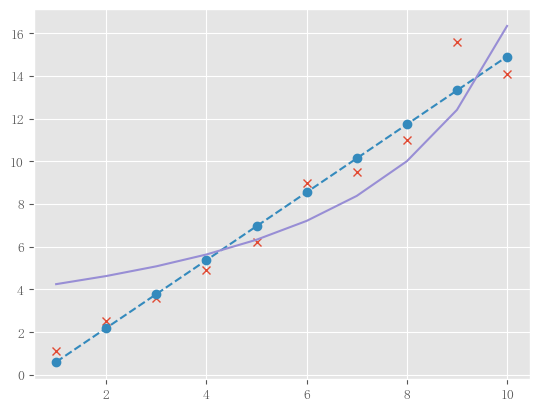

In [50]:
X = np.arange(1, 11, 1)
Y = np.array([1.1, 2.5, 3.6, 4.9, 6.2, 9.0, 9.5, 11.0, 15.6, 14.1])
# 进行线性回归，得出合适的多项式系数
p = np.polyfit(X, Y, 1)
print(p)


# 自定义函数
def Pfun(X, a, b):
    return 1 / (a + b * X)


# 第一个是根据自定义函数给出的最合适的系数
popt, pcov = curve_fit(Pfun, X, Y)
print(popt)

# 绘图
# polyval 是进行多项式乘法的系数
plt.plot(X, Y, "x", X, np.polyval(p, X), "o--", X, Pfun(X, *popt), "-")
plt.show()

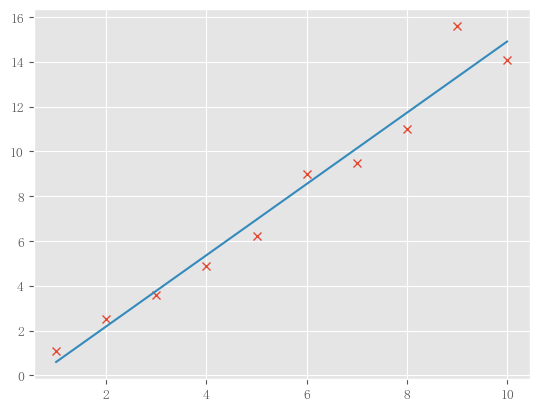

In [44]:
X = np.arange(1, 11, 1)
Y = np.array([1.1, 2.5, 3.6, 4.9, 6.2, 9.0, 9.5, 11.0, 15.6, 14.1])

X_model = sm.add_constant(X)

# 添加常数项
X_model = sm.add_constant(X)

# 创建线性回归模型
model = sm.OLS(Y, X_model)

# 拟合模型
results = model.fit()

# 绘制数据点
plt.plot(X, Y, "x", label="Data")

# 绘制回归线
plt.plot(X, results.predict(), color="red", label="Linear Regression")

# 添加标题和标签
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")

# 添加图例
plt.legend()

# 显示图形
plt.show()

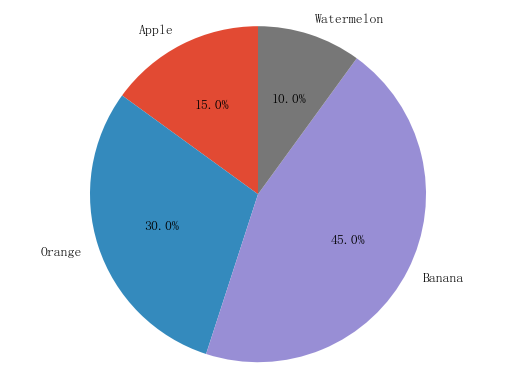

In [76]:
# 标签
labels = ["Apple", "Orange", "Banana", "Watermelon"]
# 大小
sizes = [15, 30, 45, 10]
# 中心位置
explode = (0, 0, 0, 0)
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    # 保留百分号，外面两个设置格式用的
    autopct="%1.1f%%",
    # 没阴影，说明是平面的
    shadow=False,
    # 开始的角度，代表从十二点钟开始
    startangle=90,
)
plt.axis("equal")
plt.show()

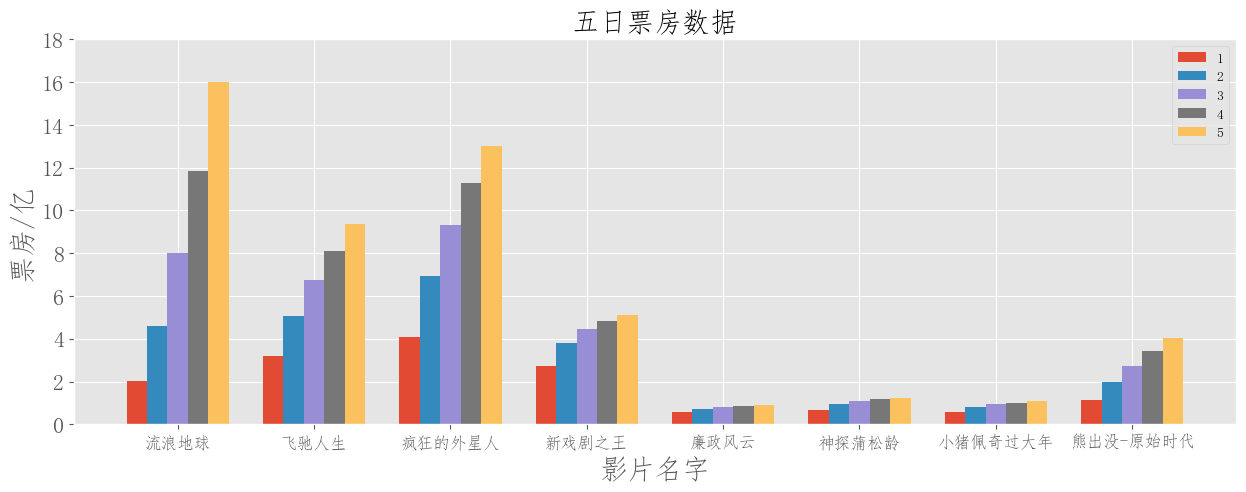

In [74]:
movies = {
    "流浪地球": [2.01, 4.59, 7.99, 11.83, 16],
    "飞驰人生": [3.19, 5.08, 6.73, 8.10, 9.35],
    "疯狂的外星人": [4.07, 6.92, 9.30, 11.29, 13.03],
    "新戏剧之王": [2.72, 3.79, 4.45, 4.83, 5.11],
    "廉政风云": [0.56, 0.74, 0.83, 0.88, 0.92],
    "神探蒲松龄": [0.66, 0.95, 1.10, 1.17, 1.23],
    "小猪佩奇过大年": [0.58, 0.81, 0.94, 1.01, 1.07],
    "熊出没-原始时代": [1.13, 1.96, 2.73, 3.42, 4.05],
}

mdf = pd.DataFrame(movies)

plt.figure(figsize=(15, 5))
xticks = np.arange(len(movies))
bar_width = 0.15

plt.bar(xticks - 2 * bar_width, mdf.iloc[0], width=bar_width)
plt.bar(xticks - bar_width, mdf.iloc[1], width=bar_width)
plt.bar(xticks, mdf.iloc[2], width=bar_width)
plt.bar(xticks + bar_width, mdf.iloc[3], width=bar_width)
plt.bar(xticks + 2 * bar_width, mdf.iloc[4], width=bar_width)

plt.xticks(xticks, mdf.columns, size=12)
plt.yticks(range(0, 20, 2), [a for a in range(0, 20, 2)], size=16)
plt.ylabel("票房/亿", size=20)
plt.xlabel("影片名字", size=20)
plt.legend(["1", "2", "3", "4", "5"])
plt.title("五日票房数据", size=20)
plt.show()

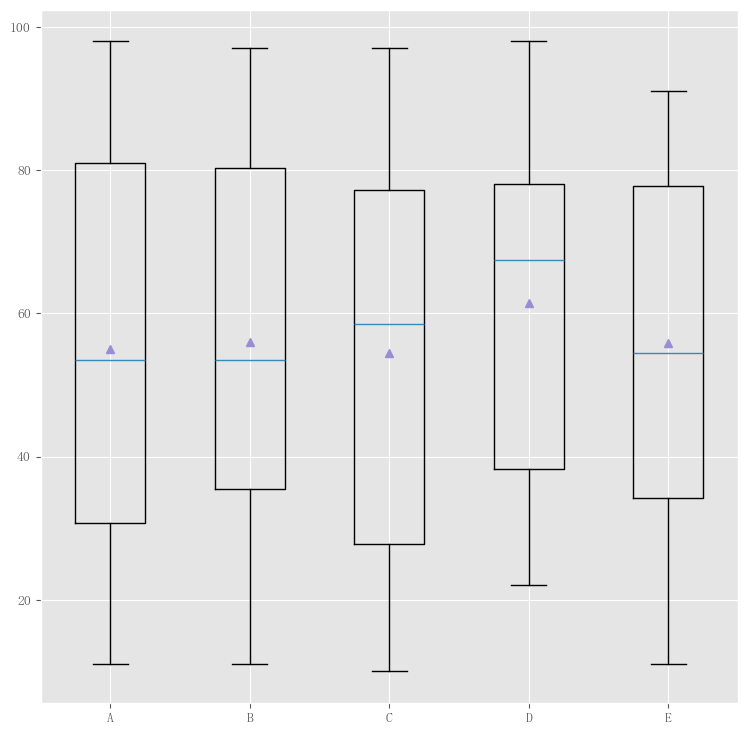

In [88]:
# 生成 10~100 的 5 行 20 列的数
x = np.random.randint(10, 100, size=(20, 5))
plt.figure(figsize=(9, 9))

plt.boxplot(
    x,
    labels=["A", "B", "C", "D", "E"],  # 添加标签
    sym="g+",  # 异常点形状，默认为 "+"
    showmeans=True,  # 是否显示均值，默认不显示
)
plt.show()

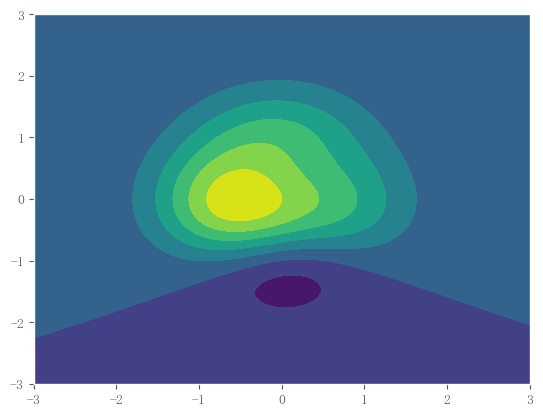

In [91]:
def func(x, y):
    return (1 - x / 2 + x**2 + y**3) * np.exp(-(x**2) - y**2)


plt.figure()
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, func(X, Y))

(-1.01, 1.01)

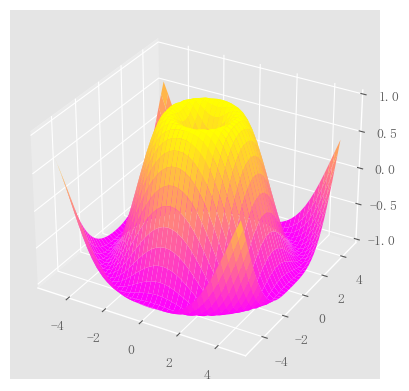

In [105]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="spring")
ax.set_zlim(-1.01, 1.01)

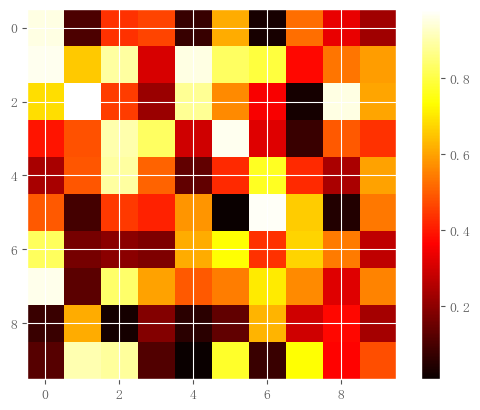

In [108]:
data = np.random.rand(10, 10)
plt.imshow(data, cmap="hot", interpolation="nearest")
plt.colorbar()